In [1]:
import pyvisa
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rm = pyvisa.ResourceManager()

rm.list_resources() 

('ASRL1::INSTR', 'ASRL10::INSTR')

In [3]:
vna = rm.open_resource("tcpip0::192.168.40.10::inst0::INSTR") #collegamento allo strumento

#imposta su VNA. Per Spectrum analyzer fare "SA"
vna.query('INST:SEL "NA";*OPC?')

'1\n'

In [4]:
vna.query('CALC:PAR1:DEF S21;*OPC?')  #QUESTO VA!! Scegli tra = S11,S12, S21, S22

'1\n'

In [5]:
vna.query('CALC:FORM?')       #PAG. 267 NON CAPISCO A COSA SERVA


start = 5e9
stop = 11e9     #start e stop sono fmin e fmax. Qui impostati a mano. Dovremo scriverli chiedendo di impostare il valore all'utente

def get_data(fmin, fmax):
    
    vna.query('FREQ:START ' + str(fmin)+ ';*OPC?')     #set freq iniziale
    vna.query('FREQ:STOP ' + str(fmax)+ ';*OPC?')      #set freq finale

    valori = vna.query('TRACE:DATA? SDATA') #pag 767  lista di parte reale e parte immaginaria alternati
    valori = list(map(float, valori.strip('\n').split(',')))

    I = np.array(valori[::2]) # parte imm
    Q = np.array(valori[1::2]) #parte reale



    f = vna.query('FREQ:DATA?')
    f = np.array(list(map(float, f.strip('\n').split(','))))/1e9
    


    return f, I, Q


f,I,Q = get_data(start, stop)




c:\Users\oper\SynologyDrive\Lab2023\Qubit\qubit2324\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


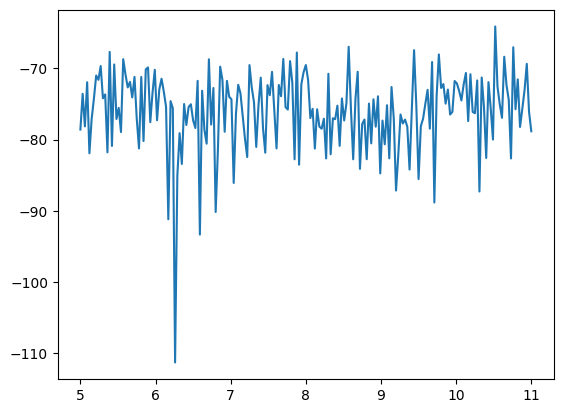

In [6]:
plt.plot(f, 20*np.log10(np.abs(Q)+1j*I))


In [13]:
vna.query('SENS:FREQ:START MIN') 

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.